# Epicenter computation
### Existing methods
In seismic waves propagation, one usually uses triangulation between stations, and the distance is estimated by computing the distance between the $P-$ and $S-$waves. In this particular framework, only one acoustic wave is propagating through the field. Therefore this method does not work. We aim at solving the epicenter inverse problem for the acoustic wave.

In [1]:
from PyAWD.AcousticWaveDataset import *
import numpy as np
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
sns.set_theme()

In [2]:
train = torch.load("../../local/datasets/AWD/train_small.pt")
X = [train[i][1].flatten() for i in range(train.size)]
Y = [train[i][0][0] for i in range(train.size)]

In [3]:
test = torch.load("../../local/datasets/AWD/test_small.pt")
X_test = np.array([test[i][1].flatten() for i in range(test.size)])
Y_test = np.array([test[i][0][0] for i in range(test.size)])

## Data presentation

We work with pairs of data under the form:
- Epicenter $(x, y)$
- Wave mesured every $2$ seconds for $10$ seconds.

As an example, sample $0$ starts at this epicenter:

In [4]:
print("Epicenter:", train[0][0])

Epicenter: [43 71]


and yields this propagation measurement:

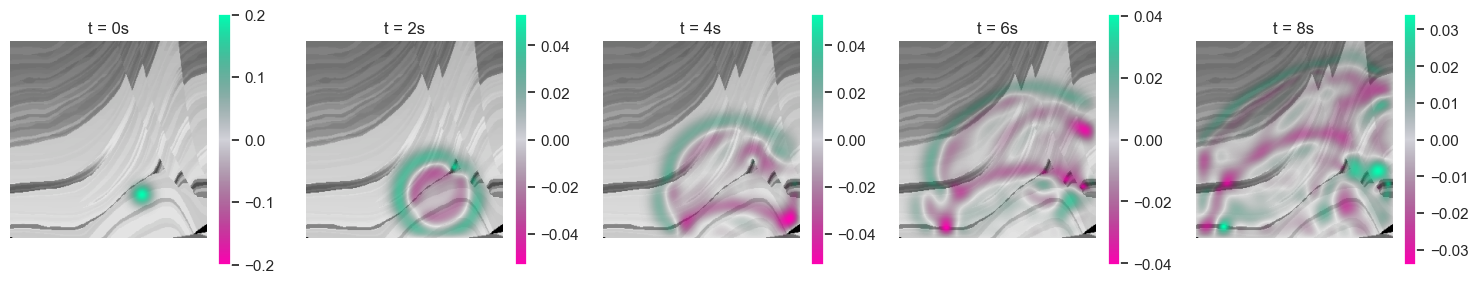

In [5]:
train.plot_item(0)

## Linear regression

In [6]:
linear = LinearRegression().fit(X, Y)
Y_hat = linear.predict(X_test)
linear_mae =  (np.mean(np.abs(Y_test-Y_hat))/((test.nx//2)*test.sx))
print("Normalized MAE:", linear_mae)

Normalized MAE: 0.24205547899007798


## Principal Components Analysis

In [7]:
pca = PCA(n_components=125)
pca_model = pca.fit(X)

### Linear regression on PCA

In [8]:
linear_pca = LinearRegression().fit(pca_model.transform(X), Y)
Y_hat = linear_pca.predict(pca_model.transform(X_test))
linear_pca_mae = (np.mean(np.abs(Y_test-Y_hat))/((test.nx//2)*test.sx))
print("Normalized MAE:", linear_pca_mae)

Normalized MAE: 0.24207814092716287


### Polynomial regression on PCA

In [9]:
polynomial = PolynomialFeatures(degree=2)
feat_poly = polynomial.fit_transform(pca_model.transform(X))
poly_pca = LinearRegression().fit(feat_poly, Y)
feat_poly_test = polynomial.fit_transform(pca_model.transform(X_test))
Y_hat = poly_pca.predict(feat_poly_test)
poly_pca_mae = (np.mean(np.abs(Y_test-Y_hat))/((test.nx//2)*test.sx))
print("Normalized MAE:", poly_pca_mae)

Normalized MAE: 0.3194240645365516
